In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings taaki warnings disturb na karein
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Dataset load karein
# Ensure karein ki 'COPD_100k_dataset.csv' file aapke project folder mein ho
df = pd.read_csv('COPD_100k_dataset.csv')

print("="*70)
print("STEP 1: DATA LOADING AND INITIAL EXPLORATION")
print("="*70)

# 2. Dataset ka shape aur pehli 5 rows dekhna
print(f"\n1. Dataset Shape: {df.shape[0]} Rows, {df.shape[1]} Columns")
print("\n2. Pehli 5 rows:")
print(df.head())

# 3. Data types aur null values check karna
print("\n3. Dataset Information (Data types & Nulls):")
print(df.info())

# 4. Statistical Summary (Mean, Median, etc.)
print("\n4. Basic Statistics:")
print(df.describe())

# 5. Missing values ka count
print("\n5. Missing Values Check:")
print(df.isnull().sum())

STEP 1: DATA LOADING AND INITIAL EXPLORATION

1. Dataset Shape: 100000 Rows, 13 Columns

2. Pehli 5 rows:
   Age   BMI  Smoking_Pack_Years  FEV1_FVC_Ratio  FEV1_Percent_Predicted  \
0   45  28.1                15.9           0.674                      69   
1   42  20.3                 9.7           0.675                      80   
2   69  23.0                10.4           0.832                      89   
3   74  23.3                 7.3           0.768                      80   
4   62  27.2                13.8           0.671                      67   

   Oxygen_Saturation_SpO2  mMRC_Scale  Exacerbations_History  \
0                    92.9           4                      3   
1                    98.6           3                      3   
2                    98.5           2                      5   
3                    90.8           3                      4   
4                    89.9           0                      0   

   Occupational_Exposure  Eosinophil_Count  DLCO_Lev


STEP 2: TARGET VARIABLE ANALYSIS

Original COPD_Diagnosis range: 0.00 to 1.00
Binary conversion threshold: 0.5
Class distribution (0=Healthy, 1=COPD):
COPD_Diagnosis_Binary
1    82050
0    17950
Name: count, dtype: int64

Percentage Distribution:
COPD_Diagnosis_Binary
1    82.05
0    17.95
Name: proportion, dtype: float64


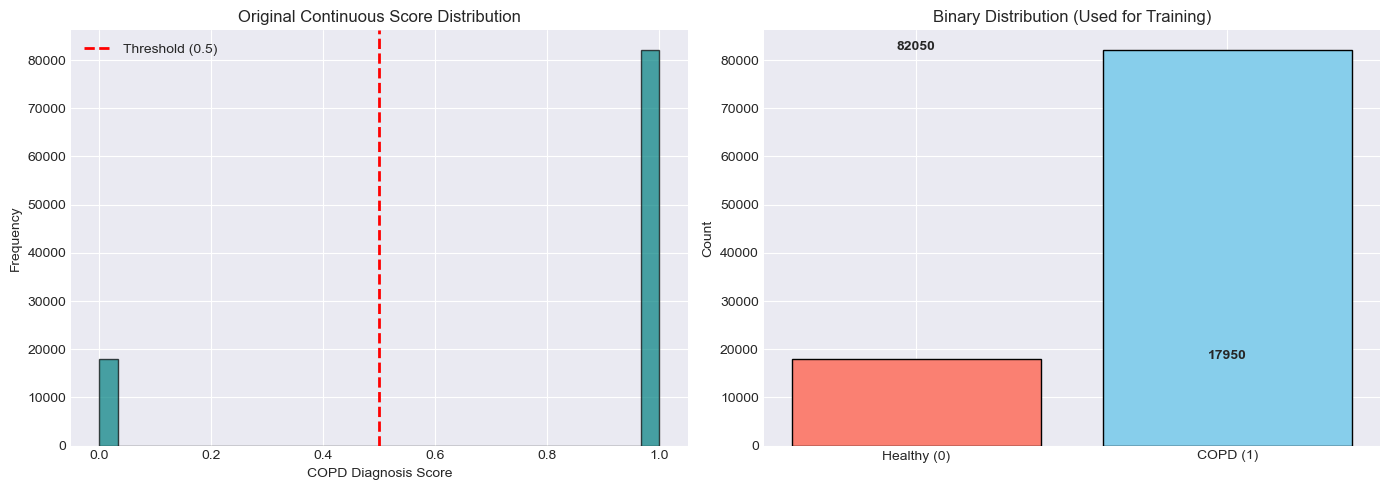

In [2]:
# ============================================================================
# STEP 2: TARGET VARIABLE ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("STEP 2: TARGET VARIABLE ANALYSIS")
print("="*70)

# Aapka 'COPD_Diagnosis' column continuous hai (0.0 se 1.0).
# Classification metrics (Recall/Precision) ke liye hum isse binary mein convert karenge.
# Hum 0.5 ko threshold maan rahe hain.

df['COPD_Diagnosis_Binary'] = (df['COPD_Diagnosis'] >= 0.5).astype(int)

print(f"\nOriginal COPD_Diagnosis range: {df['COPD_Diagnosis'].min():.2f} to {df['COPD_Diagnosis'].max():.2f}")
print(f"Binary conversion threshold: 0.5")
print(f"Class distribution (0=Healthy, 1=COPD):")
print(df['COPD_Diagnosis_Binary'].value_counts())
print(f"\nPercentage Distribution:\n{df['COPD_Diagnosis_Binary'].value_counts(normalize=True) * 100}")

# Visualization: Original vs Binary target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Continuous Distribution (Original Score)
axes[0].hist(df['COPD_Diagnosis'], bins=30, edgecolor='black', alpha=0.7, color='teal')
axes[0].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Threshold (0.5)')
axes[0].set_xlabel('COPD Diagnosis Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Original Continuous Score Distribution')
axes[0].legend()

# 2. Binary Distribution (For Training)
class_counts = df['COPD_Diagnosis_Binary'].value_counts()
axes[1].bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'], edgecolor='black')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Healthy (0)', 'COPD (1)'])
axes[1].set_ylabel('Count')
axes[1].set_title('Binary Distribution (Used for Training)')

# Bars ke upar numbers likhna
for i, v in enumerate(class_counts.values):
    axes[1].text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

Total Features: 12
Feature Names: ['Age', 'BMI', 'Smoking_Pack_Years', 'FEV1_FVC_Ratio', 'FEV1_Percent_Predicted', 'Oxygen_Saturation_SpO2', 'mMRC_Scale', 'Exacerbations_History', 'Occupational_Exposure', 'Eosinophil_Count', 'DLCO_Level', 'AAT_Level']


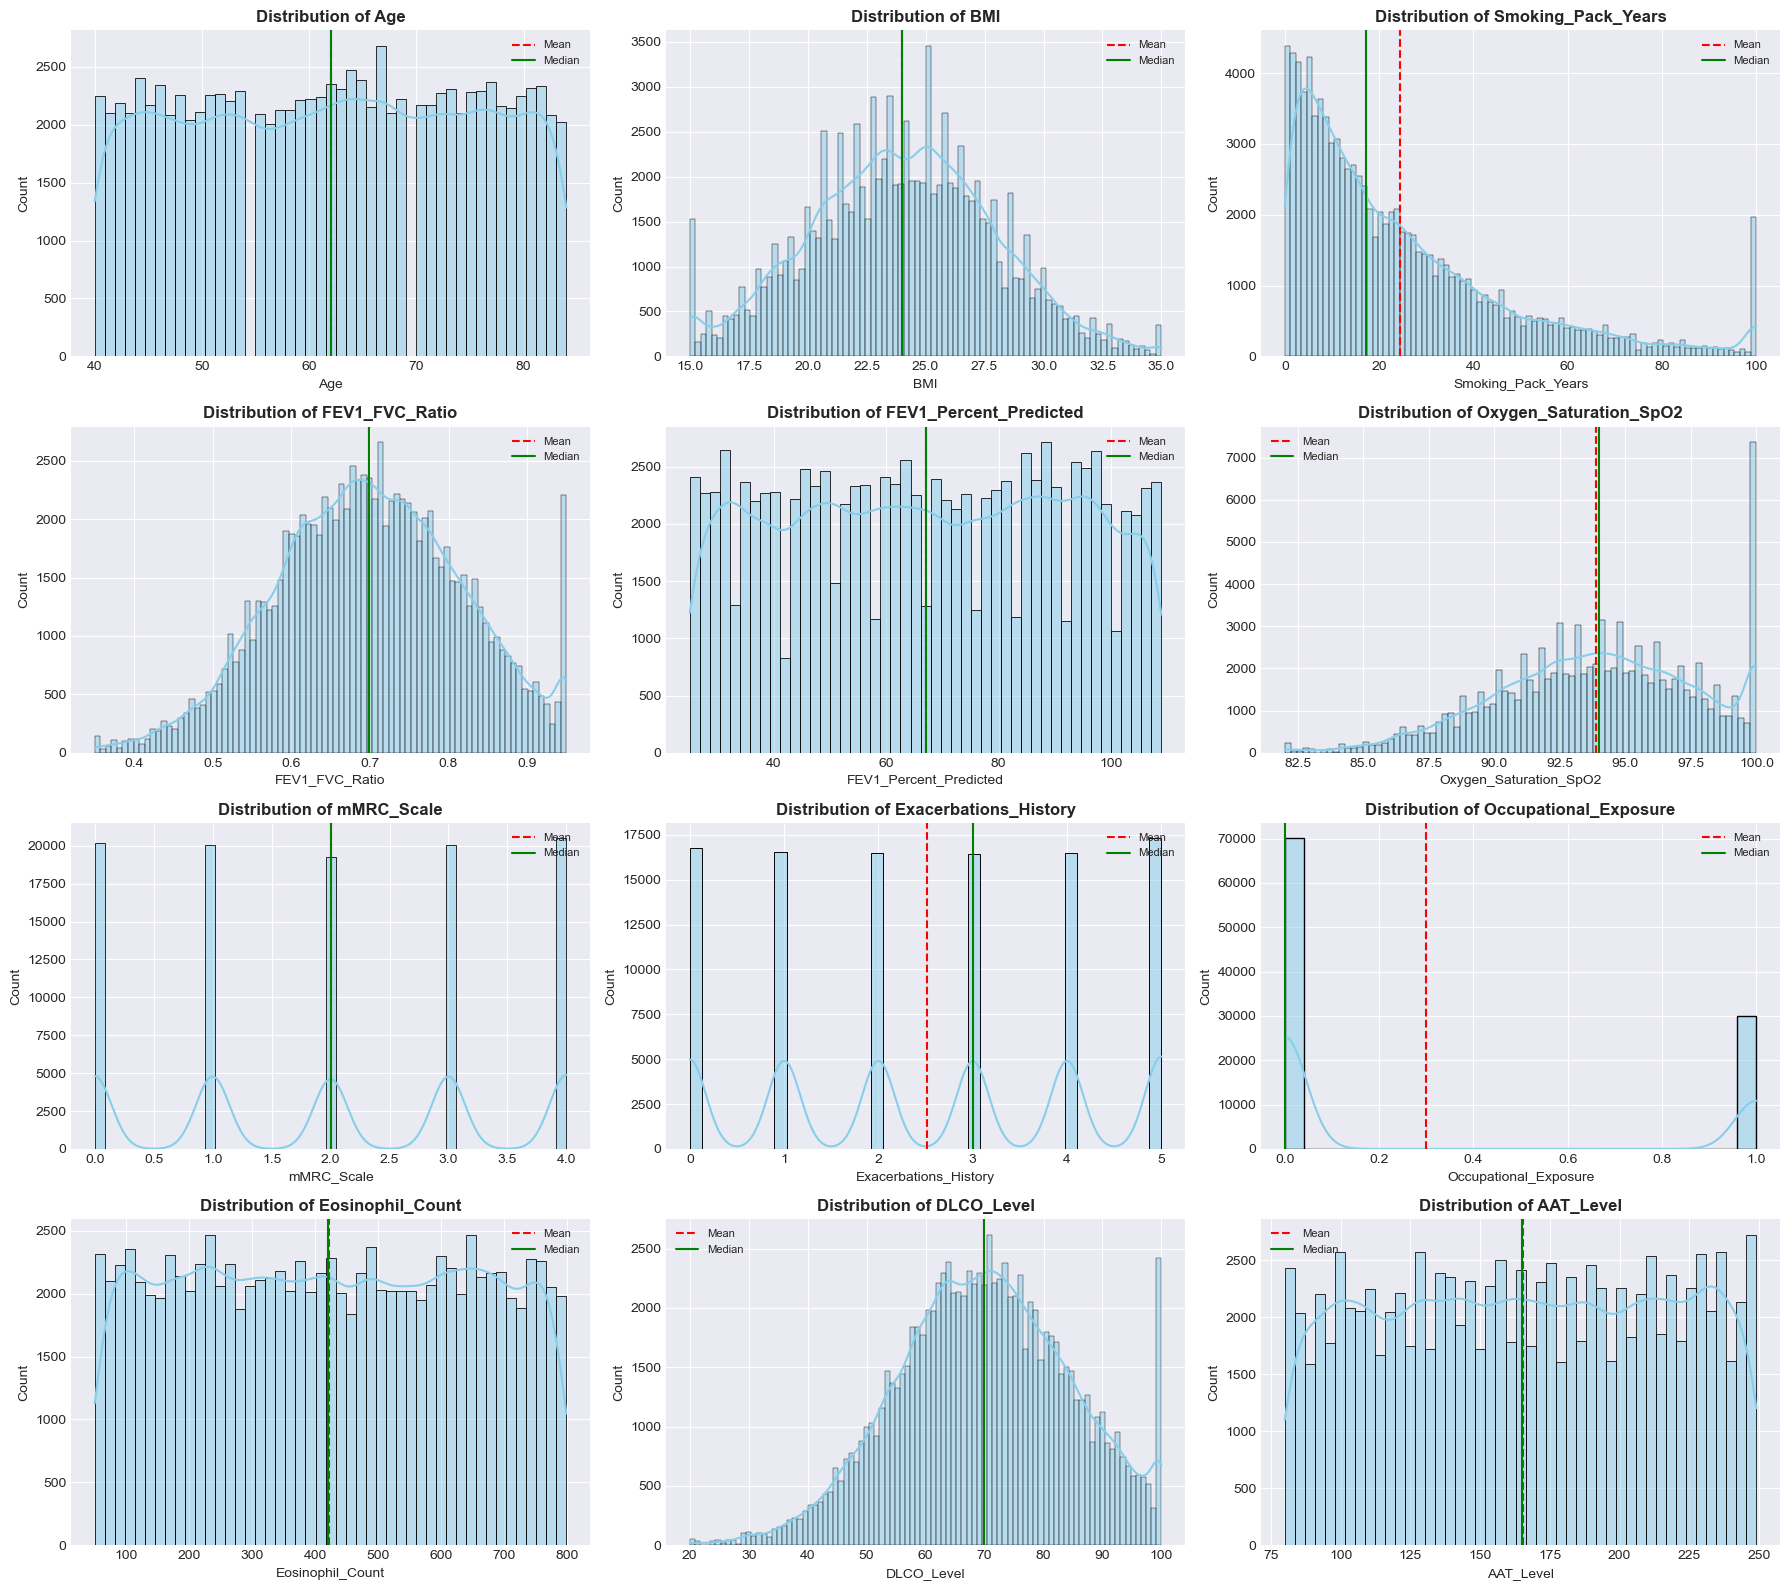


Top 5 Features jo COPD se sabse zyada Jude hain:
COPD_Diagnosis            1.000000
COPD_Diagnosis_Binary     1.000000
Smoking_Pack_Years        0.288781
mMRC_Scale                0.131723
FEV1_Percent_Predicted    0.009058
Occupational_Exposure     0.004776
Name: COPD_Diagnosis_Binary, dtype: float64


In [3]:
# ============================================================================
# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "="*70)
print("STEP 3: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*70)

# 1. Features aur Target ko alag-alag identify karein
# Hum original 'COPD_Diagnosis' aur naya 'COPD_Diagnosis_Binary' drop karenge features se
features_list = df.drop(['COPD_Diagnosis', 'COPD_Diagnosis_Binary'], axis=1).columns.tolist()

print(f"\nTotal Features: {len(features_list)}")
print("Feature Names:", features_list)

# 2. Numerical Features ki distribution dekhna
# Hum pehle 12 features ko plot karenge taaki graph clear dikhe
numerical_cols = features_list[:12] 

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    
    # Mean aur Median ki lines add karna
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='-', label='Median')
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

# 3. Target ke saath correlation check karna (Basic insight)
top_corr = df.corr()['COPD_Diagnosis_Binary'].sort_values(ascending=False).head(6)
print("\nTop 5 Features jo COPD se sabse zyada Jude hain:")
print(top_corr)


STEP 4: OUTLIER DETECTION AND ANALYSIS

Outliers detected in these features:
                  Feature  Outliers Count Outlier %
0                     BMI             343     0.34%
1      Smoking_Pack_Years            4720     4.72%
2          FEV1_FVC_Ratio             200     0.20%
3  Oxygen_Saturation_SpO2             490     0.49%
4              DLCO_Level             363     0.36%


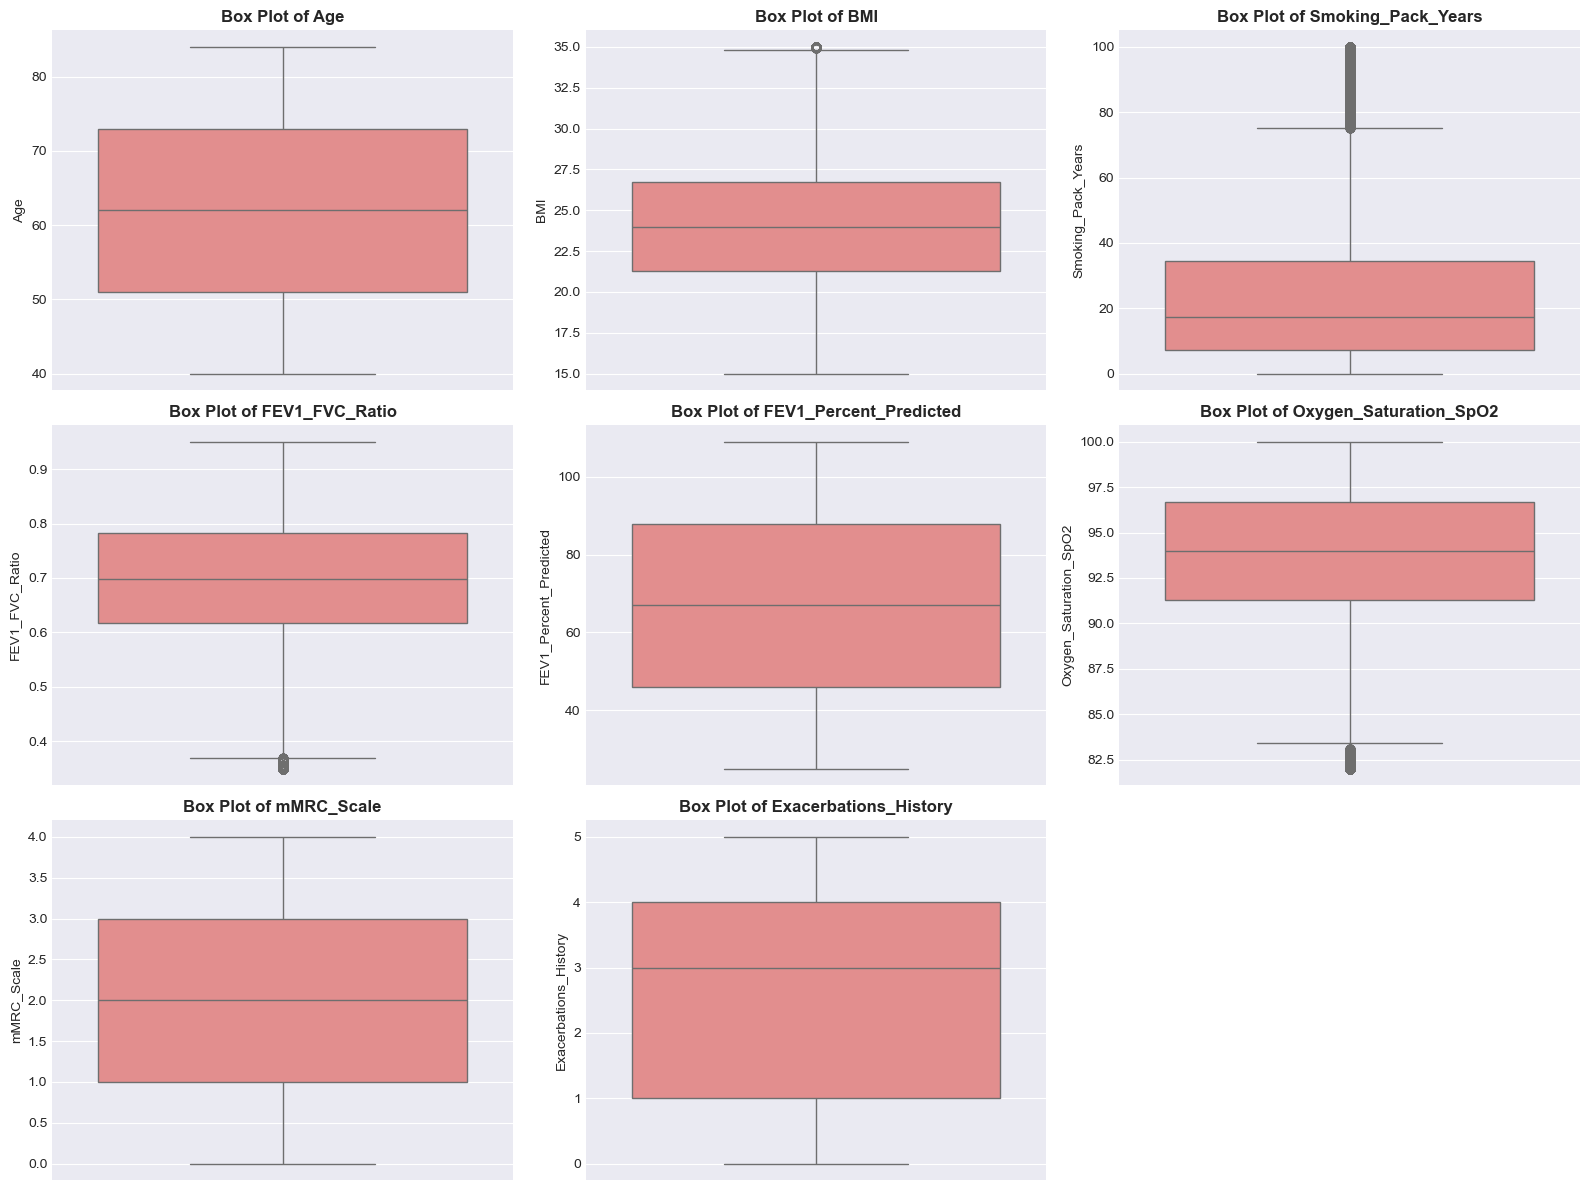

In [4]:
# ============================================================================
# STEP 4: OUTLIER DETECTION AND ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("STEP 4: OUTLIER DETECTION AND ANALYSIS")
print("="*70)

# 1. IQR Method se outliers identify karna
numerical_features = df.drop(['COPD_Diagnosis', 'COPD_Diagnosis_Binary'], axis=1).select_dtypes(include=[np.number]).columns.tolist()

outlier_summary = []
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    if len(outliers) > 0:
        outlier_summary.append({
            'Feature': col,
            'Outliers Count': len(outliers),
            'Outlier %': f'{outlier_percentage:.2f}%'
        })

print("\nOutliers detected in these features:")
print(pd.DataFrame(outlier_summary))

# 2. Box Plots Visualization
# Hum pehle 8 numerical features ko plot karenge
cols_to_plot = numerical_features[:8]

plt.figure(figsize=(16, 12))
for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Box Plot of {col}', fontweight='bold')

plt.tight_layout()
plt.show()


STEP 5: CORRELATION ANALYSIS


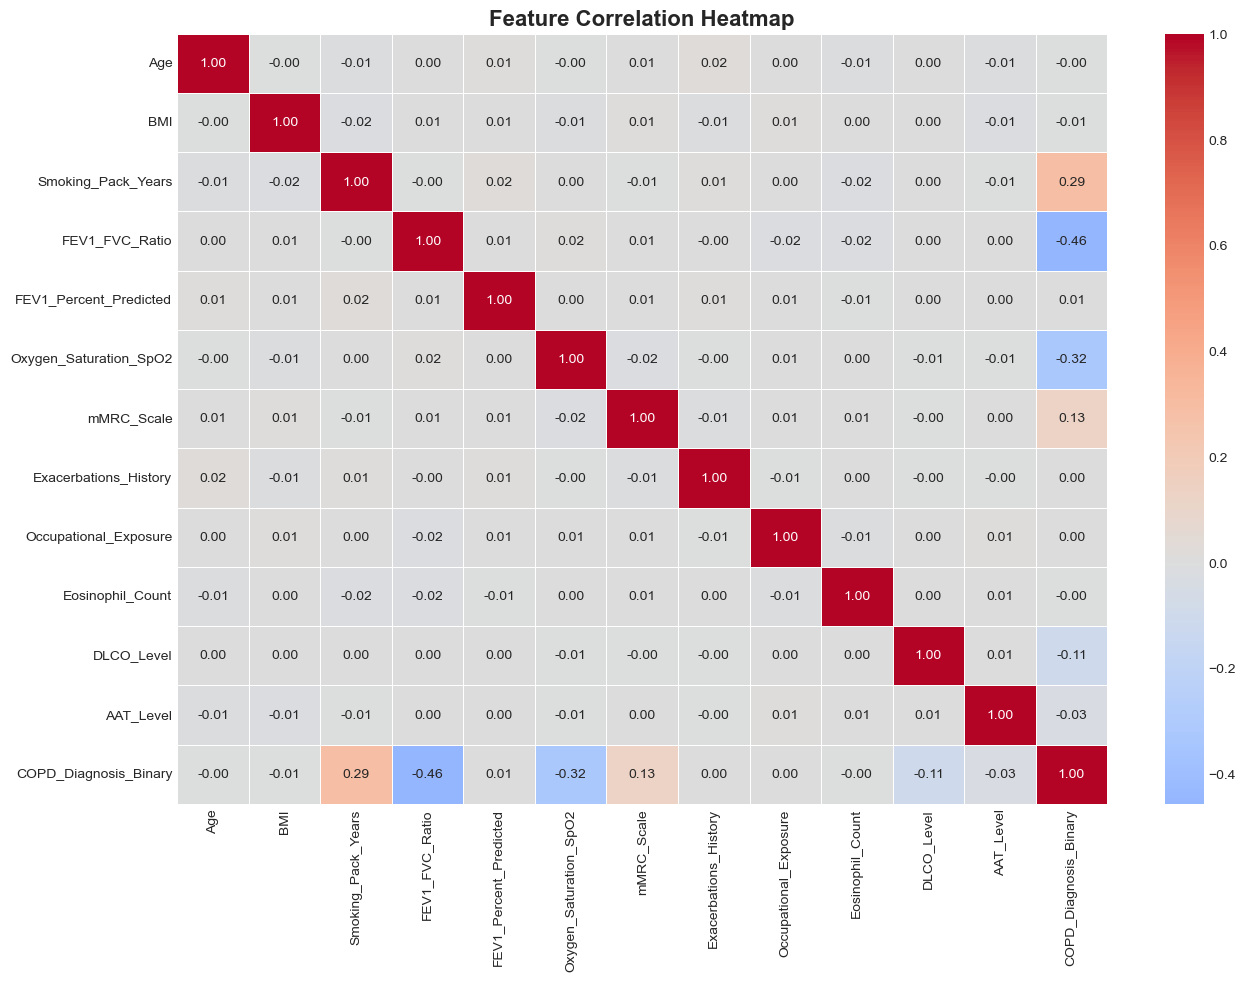


Features with HIGHEST impact on COPD (Positive Correlation):
COPD_Diagnosis_Binary     1.000000
Smoking_Pack_Years        0.288781
mMRC_Scale                0.131723
FEV1_Percent_Predicted    0.009058
Occupational_Exposure     0.004776
Exacerbations_History     0.002028
Name: COPD_Diagnosis_Binary, dtype: float64

Features with LOWEST impact or Inverse impact (Negative Correlation):
BMI                      -0.005314
AAT_Level                -0.033137
DLCO_Level               -0.105853
Oxygen_Saturation_SpO2   -0.323426
FEV1_FVC_Ratio           -0.456736
Name: COPD_Diagnosis_Binary, dtype: float64


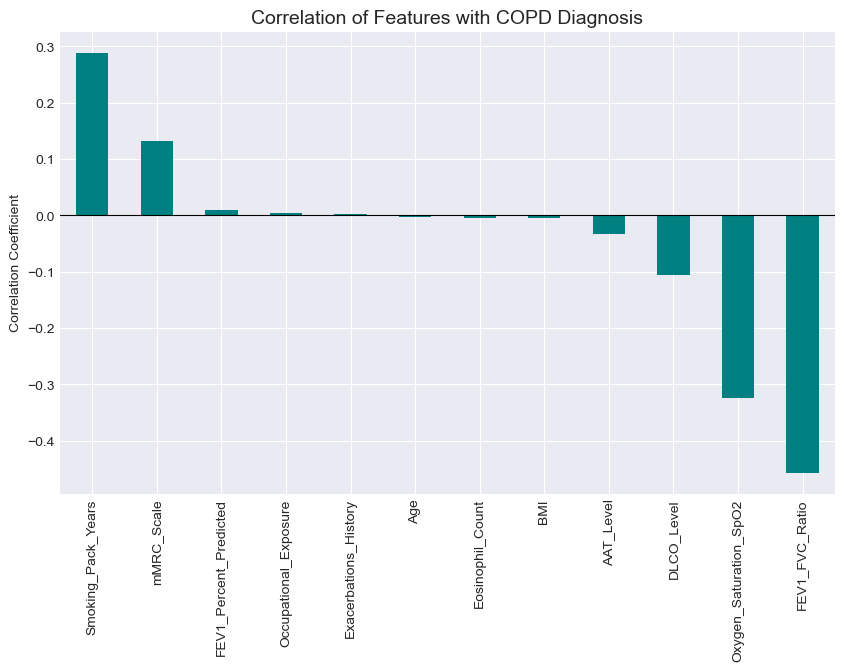

In [5]:
# ============================================================================
# STEP 5: CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("STEP 5: CORRELATION ANALYSIS")
print("="*70)

# 1. Correlation Matrix calculate karna
# Hum sirf numerical columns ka correlation nikalenge
corr_matrix = df.drop(['COPD_Diagnosis'], axis=1).corr()

# 2. Heatmap Visualization
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

# 3. Target (COPD_Diagnosis_Binary) ke saath Correlation
target_corr = corr_matrix['COPD_Diagnosis_Binary'].sort_values(ascending=False)

print("\nFeatures with HIGHEST impact on COPD (Positive Correlation):")
print(target_corr.head(6)) # Top 5 + Target itself

print("\nFeatures with LOWEST impact or Inverse impact (Negative Correlation):")
print(target_corr.tail(5))

# 4. Correlation with Target Plot
plt.figure(figsize=(10, 6))
target_corr.drop('COPD_Diagnosis_Binary').plot(kind='bar', color='teal')
plt.title('Correlation of Features with COPD Diagnosis', fontsize=14)
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

In [6]:
# ============================================================================
# STEP 6: DATA PREPROCESSING
# ============================================================================

print("\n" + "="*70)
print("STEP 6: DATA PREPROCESSING")
print("="*70)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

# 1. Features (X) aur Target (y) ko finalize karein
# Hum original continuous target 'COPD_Diagnosis' ko drop kar rahe hain 
# kyunki training ke liye humne binary column banaya hai.
X = df.drop(['COPD_Diagnosis', 'COPD_Diagnosis_Binary'], axis=1)
y = df['COPD_Diagnosis_Binary']

# 2. Missing Values handle karein (Imputation)
# 'median' strategy outliers ke liye safe hoti hai
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(f"\n1. Missing values check (after imputation): {X_imputed.isnull().sum().sum()}")

# 3. Scaling (Robust Scaling)
# Yeh features ko ek standard range mein le aayega
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

print("2. Scaling complete. Data ab model ke liye optimized hai.")

# 4. Train-Test Split
# test_size=0.2 matlab 20% data testing ke liye rakha hai.
# stratify=y isliye taaki dono sets mein COPD aur Healthy patients ka ratio barabar rahe.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n3. Data Splitting Results:")
print(f"   - Training Set: {X_train.shape[0]} samples")
print(f"   - Testing Set:  {X_test.shape[0]} samples")
print(f"\n4. Training Target Distribution (Class Balance):\n{y_train.value_counts(normalize=True) * 100}")


STEP 6: DATA PREPROCESSING

1. Missing values check (after imputation): 0
2. Scaling complete. Data ab model ke liye optimized hai.

3. Data Splitting Results:
   - Training Set: 80000 samples
   - Testing Set:  20000 samples

4. Training Target Distribution (Class Balance):
COPD_Diagnosis_Binary
1    82.05
0    17.95
Name: proportion, dtype: float64


In [8]:
# ============================================================================
# STEP 7: MODEL TRAINING AND EVALUATION
# ============================================================================

print("\n" + "="*70)
print("STEP 7: MODEL TRAINING AND EVALUATION")
print("="*70)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve)

# 1. Model Initialization
# n_estimators=100 matlab hum 100 trees use kar rahe hain
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Model Training
print("Training the Random Forest model... Please wait.")
rf_model.fit(X_train, y_train)
print("Model Training Complete!")

# 3. Predictions (Do types ki predictions)
# Type A: Binary Prediction (0 ya 1) - Accuracy/Recall ke liye
y_pred = rf_model.predict(X_test)

# Type B: Probability Prediction (0.0 se 1.0) - Aapke Frontend ke liye
# predict_proba humein do columns deta hai [prob of 0, prob of 1]
# Humein sirf 'prob of 1' (COPD hone ka risk) chahiye
y_risk_scores = rf_model.predict_proba(X_test)[:, 1]

# 4. Performance Metrics (Recall, Precision, etc.)
print("\n--- MODEL PERFORMANCE METRICS ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_risk_scores):.4f}")

# 5. Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy (0)', 'COPD (1)']))

# 6. Score ka Example dekhna (Frontend logic)
print("\nExample of Risk Scores (0-1 range) for first 5 patients:")
for i in range(5):
    print(f"Patient {i+1}: Risk Score = {y_risk_scores[i]:.4f} ({y_risk_scores[i]*100:.1f}%)")


STEP 7: MODEL TRAINING AND EVALUATION
Training the Random Forest model... Please wait.
Model Training Complete!

--- MODEL PERFORMANCE METRICS ---
Accuracy:  0.9780
Precision: 0.9806
Recall:    0.9928
F1-Score:  0.9867
ROC-AUC:   0.9975

Classification Report:
              precision    recall  f1-score   support

 Healthy (0)       0.97      0.91      0.94      3590
    COPD (1)       0.98      0.99      0.99     16410

    accuracy                           0.98     20000
   macro avg       0.97      0.95      0.96     20000
weighted avg       0.98      0.98      0.98     20000


Example of Risk Scores (0-1 range) for first 5 patients:
Patient 1: Risk Score = 1.0000 (100.0%)
Patient 2: Risk Score = 0.3300 (33.0%)
Patient 3: Risk Score = 0.9300 (93.0%)
Patient 4: Risk Score = 0.9700 (97.0%)
Patient 5: Risk Score = 1.0000 (100.0%)


In [10]:
# ============================================================================
# STEP 8: MODEL SAVING AND FRONTEND INTEGRATION
# ============================================================================

import joblib

print("\n" + "="*70)
print("STEP 8: SAVING MODEL FOR DEPLOYMENT")
print("="*70)

# 1. Sab kuch ek dictionary mein pack karein
# Humein Scaler aur Imputer ki bhi zaroorat padegi kyunki frontend ka raw data
# bina scale huye model mein nahi ja sakta.
model_bundle = {
    'model': rf_model,
    'scaler': scaler,
    'imputer': imputer,
    'features': X.columns.tolist()
}

# 2. File save karein
joblib.dump(model_bundle, 'copd_risk_model.pkl')
print("\n--- Model Saved successfully as 'copd_risk_model.pkl' ---")

# ============================================================================
# YE CODE AAPKO FRONTEND (SERVER.PY) MEIN USE KARNA HAI
# ============================================================================

def get_frontend_prediction(patient_input_data):
    """
    input_data: List of values from frontend form
    Returns: Risk Score (0.0 to 1.0)
    """
    # Bundle load karein
    bundle = joblib.load('copd_risk_model.pkl')
    
    # 1. Data ko DataFrame mein badlein
    input_df = pd.DataFrame([patient_input_data], columns=bundle['features'])
    
    # 2. Preprocessing (Jo humne training mein ki thi)
    imputed_data = bundle['imputer'].transform(input_df)
    scaled_data = bundle['scaler'].transform(imputed_data)
    
    # 3. YAHAN HAI JADU: Predict Proba
    # Isse 0-1 ke beech ki value milegi
    risk_probability = bundle['model'].predict_proba(scaled_data)[:, 1]
    
    return float(risk_probability[0])

# --- TEST ---
# Ek dummy input test karte hain (Maano frontend se data aaya)
test_patient = X_test.iloc[0].values 
score = get_frontend_prediction(test_patient)

print(f"FOR Frontend Test Result:")
print(f"input Risk Score: {score:.2f}")
print(f"SCORE OF RISK: {score*100:.1f}% COPD Risk")


STEP 8: SAVING MODEL FOR DEPLOYMENT

--- Model Saved successfully as 'copd_risk_model.pkl' ---
FOR Frontend Test Result:
input Risk Score: 0.98
SCORE OF RISK: 98.0% COPD Risk
